<a href="https://colab.research.google.com/github/vorasin22/ws.1/blob/main/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 6.7 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from IPython.display import Image

In [4]:
import pathlib
path = "drive/My Drive/Colab Notebooks/fish" 
data_dir = pathlib.Path(path)

In [5]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

371


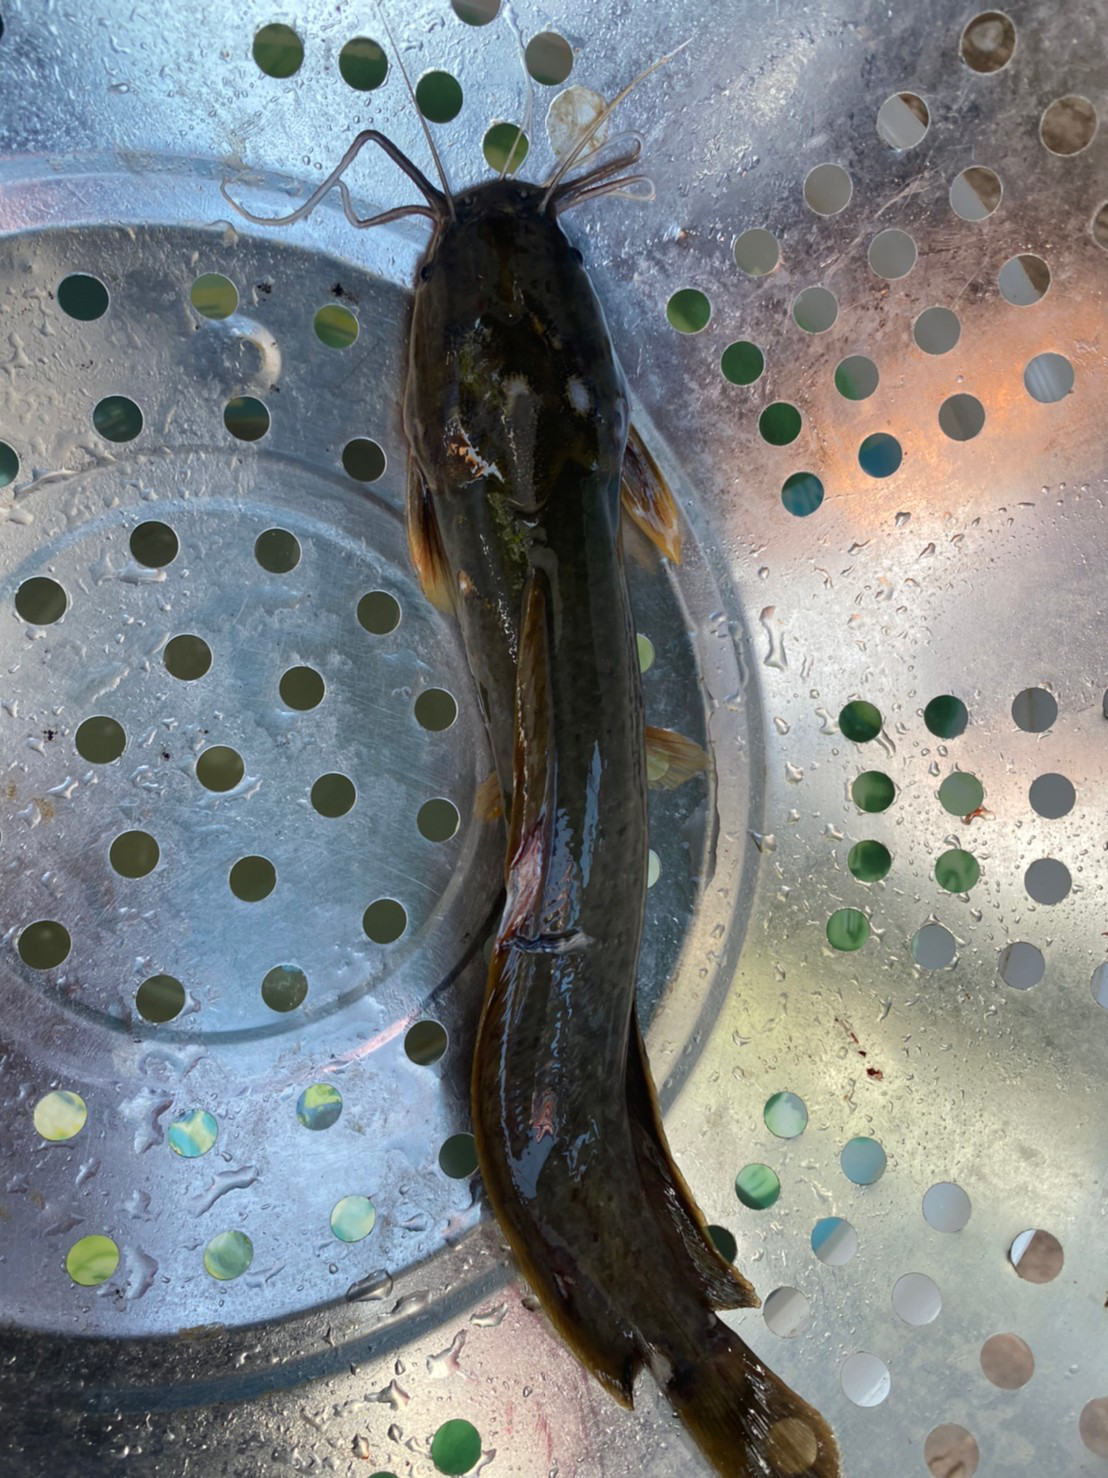

In [6]:
Catfish = list(data_dir.glob('Catfish/*')) 
PIL.Image.open(str(Catfish[7]))

In [7]:
batch_size = 32
img_height = 354
img_width = 400

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="training",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 371 files belonging to 5 classes.
Using 297 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset="validation",
seed=123,
image_size=(img_height, img_width),
batch_size=batch_size)

Found 371 files belonging to 5 classes.
Using 74 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Carp', 'Catfish', 'Not found', 'Tilapia', 'fish yy']


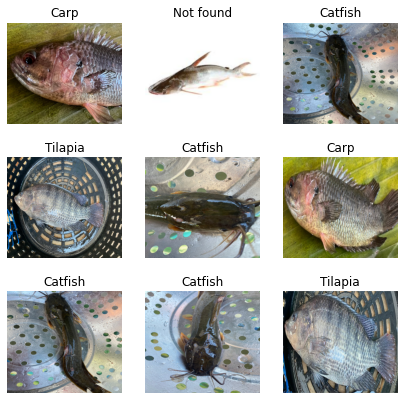

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 7))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [14]:
normalization_layer = layers.Rescaling(1./255)

In [15]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [25]:
num_classes = 5
model = Sequential([
layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
layers.Conv2D(16, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(32, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers.MaxPooling2D(),
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(num_classes)])

In [26]:
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 354, 400, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 354, 400, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 177, 200, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 177, 200, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 88, 100, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 88, 100, 64)      

In [28]:
epochs=10
history = model.fit(train_ds,
validation_data=val_ds,
epochs=epochs)

Epoch 1/10
10/10 [==============================] - 55s 5s/step - loss: 2.5575 - accuracy: 0.5455 - val_loss: 0.8591 - val_accuracy: 0.7838
Epoch 2/10
10/10 [==============================] - 41s 4s/step - loss: 0.5518 - accuracy: 0.8350 - val_loss: 0.2944 - val_accuracy: 0.9189
Epoch 3/10
10/10 [==============================] - 41s 4s/step - loss: 0.1848 - accuracy: 0.9495 - val_loss: 0.2590 - val_accuracy: 0.9324
Epoch 4/10
10/10 [==============================] - 41s 4s/step - loss: 0.1013 - accuracy: 0.9529 - val_loss: 0.1700 - val_accuracy: 0.9730
Epoch 5/10
10/10 [==============================] - 41s 4s/step - loss: 0.0317 - accuracy: 0.9899 - val_loss: 0.2025 - val_accuracy: 0.9730
Epoch 6/10
10/10 [==============================] - 41s 4s/step - loss: 0.0176 - accuracy: 1.0000 - val_loss: 0.3056 - val_accuracy: 0.9595
Epoch 7/10
10/10 [==============================] - 41s 4s/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.1112 - val_accuracy: 0.9865
Epoch 8/10
10/10 [==

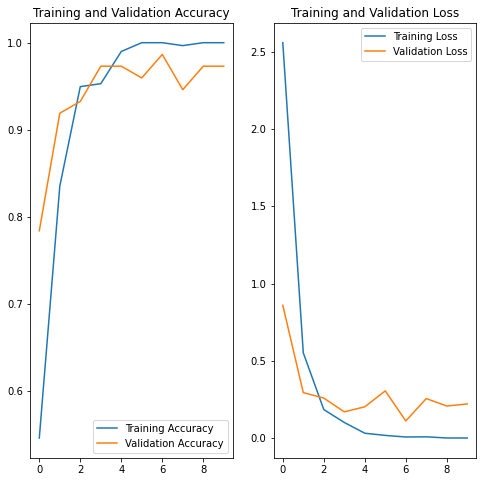

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

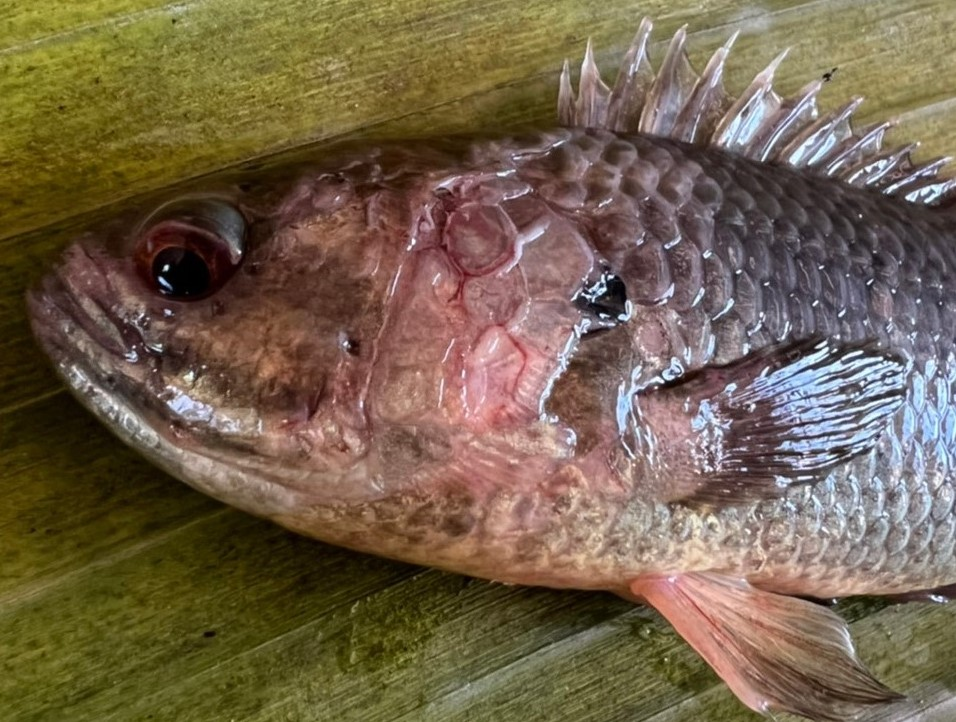

This image most likely belongs to Carp with a 100.00 percent confidence.


In [30]:
path = "/content/drive/My Drive/Colab Notebooks/fish/Carp/carp3.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

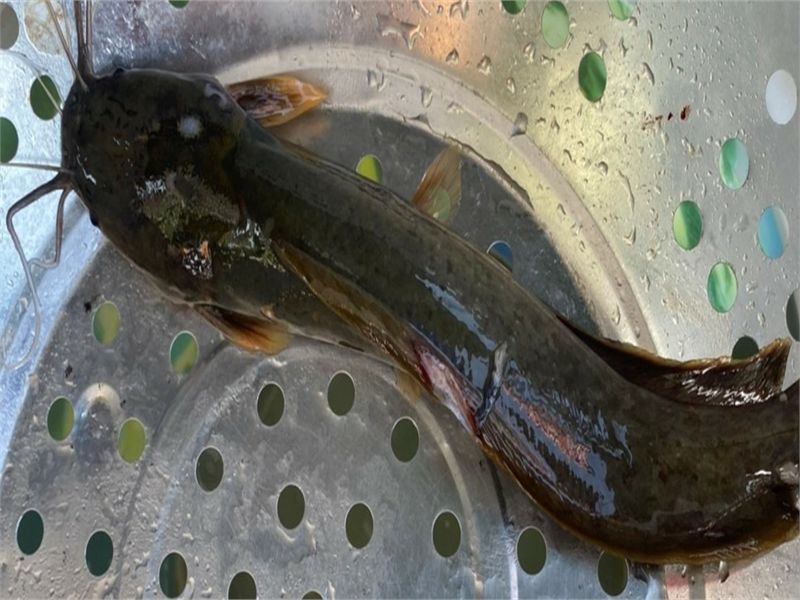

This image most likely belongs to Catfish with a 99.69 percent confidence.


In [31]:
path = "/content/drive/My Drive/Colab Notebooks/fish/Catfish/catfish2.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

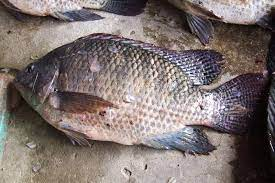

This image most likely belongs to Tilapia with a 99.97 percent confidence.


In [32]:
path = "/content/drive/My Drive/Colab Notebooks/fish/Tilapia/Tilapia2.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

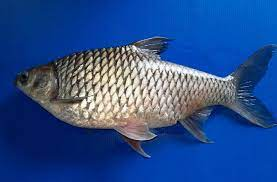

This image most likely belongs to Not found with a 100.00 percent confidence.


In [33]:
path = "/content/drive/My Drive/Colab Notebooks/fish/Not found/ray39.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))

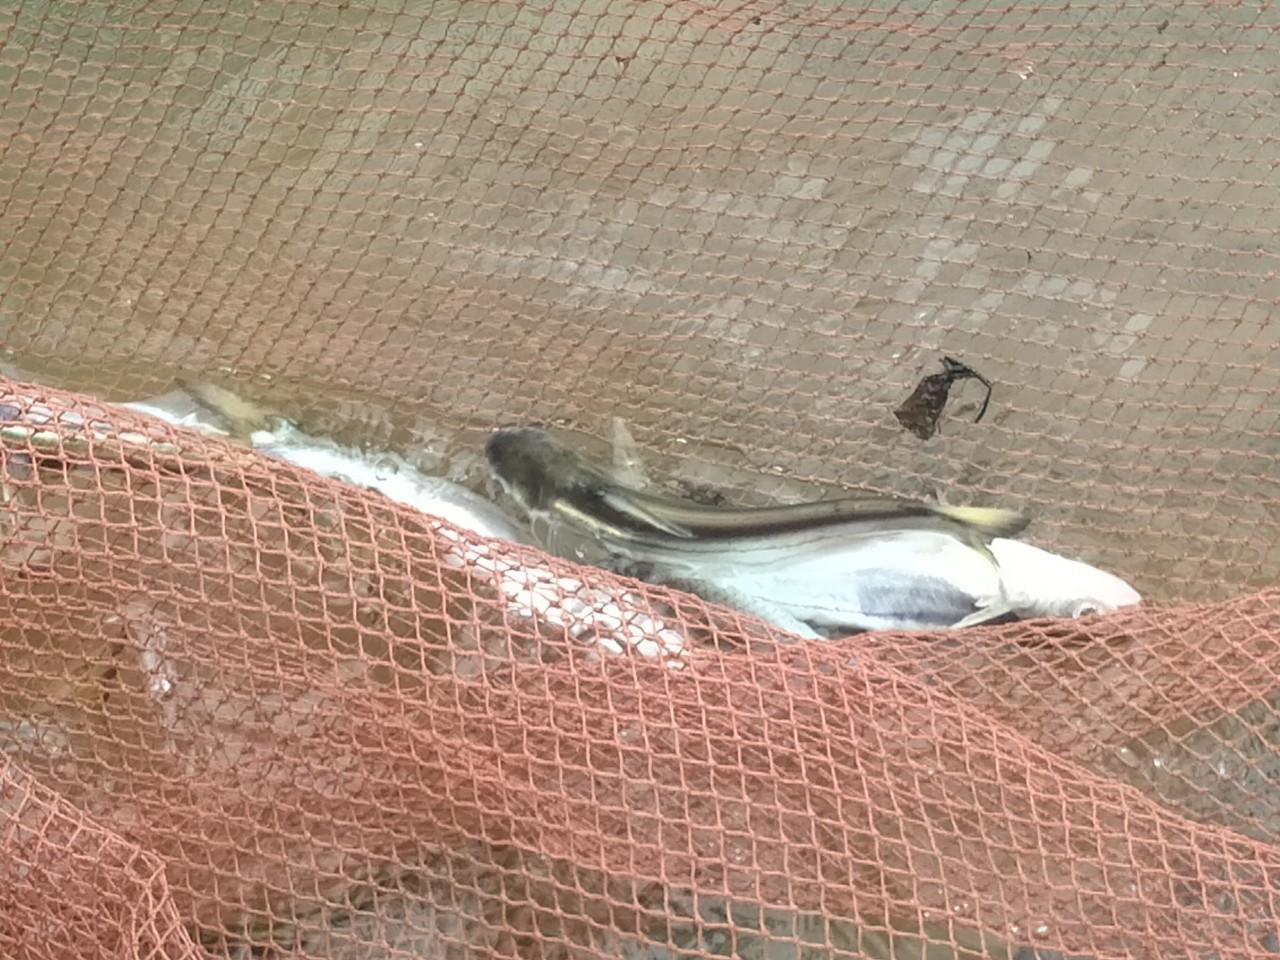

This image most likely belongs to fish yy with a 99.73 percent confidence.


In [36]:
path = "/content/drive/My Drive/Colab Notebooks/fish/fish yy/y1.jpg"
img = keras.preprocessing.image.load_img(
path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
display(Image(filename=path))
print(
"This image most likely belongs to {} with a {:.2f} percent confidence."
.format(class_names[np.argmax(score)], 100 * np.max(score)))